In [1]:
import pandas as pd
file = "Dataset_WorldPortIndex.csv"
df = pd.read_csv(file)
df.head(1)

,Unnamed: 0,World Port Index Number,Region Name,Main Port Name,Country Code,World Water Body,Sailing Direction or Publication,Tidal Range (m),Channel Depth (m),Anchorage Depth (m),...,Cranes - Mobile,Lifts - 0-24 Tons,Services - Longshoremen,Supplies - Provisions,Supplies - Potable Water,Supplies - Fuel Oil,Supplies - Diesel Oil,Repairs,Latitude,Longitude
0,0,7950.0,United States E Coast -- 6585,Maurer,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,1.5,11.0,11.0,...,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes,Moderate,40.533333,-74.25


In [8]:
df.pivot_table(values="Main Port Name", index="Country Code", aggfunc="count")

,Main Port Name
Country Code,
,4
Albania,3
Algeria,17
American Samoa,1
Angola,21
...,...
Vietnam,16
Wake Island,1
Wallis and Futuna,1


In [20]:

# Utwórz tabelę przestawną, która pokazuje średnią głębokość kanału (Channel Depth (m)) w podziale na:

# Wiersze: Country Code
# Kolumny: Harbor Size
# Dodaj miarę dodatkową, która liczy liczbę portów (Main Port Name) w każdym kraju i rozmiarze portu.

pt = df.pivot_table(index="Country Code", values=["Channel Depth (m)", "Main Port Name"], aggfunc={"Channel Depth (m)":"mean", "Main Port Name":"count"}, columns="Harbor Size", margins=True)
pt.columns.names = ["Metric", "Harbor Size"]
pt

Metric            Channel Depth (m)                                   \
Harbor Size                              Large     Medium      Small   
Country Code                                                           
                           0.000000        NaN        NaN        NaN   
Albania                         NaN        NaN        NaN   7.900000   
Algeria                         NaN  20.900000  12.500000  12.216667   
American Samoa                  NaN        NaN        NaN  23.200000   
Angola                          NaN        NaN        NaN   8.775000   
...                             ...        ...        ...        ...   
Wake Island                     NaN        NaN        NaN        NaN   
Wallis and Futuna               NaN        NaN        NaN        NaN   
Western Sahara                  NaN        NaN        NaN        NaN   
Yemen                           NaN   0.000000  11.300000   9.700000   
All                        0.713115  12.053216  11.056284   8.965728   

Metric                                  Main Port Name                        \
Harbor Size       Very Small        All                 Large Medium   Small   
Country Code                                                                   
                         NaN   0.000000            4.0    NaN    NaN     NaN   
Albania             5.650000   6.400000            NaN    NaN    NaN     1.0   
Algeria             6.900000  10.752941            NaN    2.0    1.0     6.0   
American Samoa           NaN  23.200000            NaN    NaN    NaN     1.0   
Angola             17.892308  14.419048            NaN    NaN    NaN     8.0   
...                      ...        ...            ...    ...    ...     ...   
Wake Island        23.200000  23.200000            NaN    NaN    NaN     NaN   
Wallis and Futuna   6.400000   6.400000            NaN    NaN    NaN     NaN   
Western Sahara      6.250000   6.250000            NaN    NaN    NaN     NaN   
Yemen               1.880000   5.140000            NaN    1.0    2.0     2.0   
All                 7.773302   8.374843          122.0  171.0  366.0  1030.0   

Metric                              
Harbor Size       Very Small   All  
Country Code                        
                         NaN     4  
Albania                  2.0     3  
Algeria                  8.0    17  
American Samoa           NaN     1  
Angola                  13.0    21  
...                      ...   ...  
Wake Island              1.0     1  
Wallis and Futuna        1.0     1  
Western Sahara           2.0     2  
Yemen                    5.0    10  
All                   2135.0  3824  

[197 rows x 12 columns]

In [22]:
#Utwórz tabelę przestawną, która:

# Wiersze: Region Name
# Kolumny: Harbor Type
# Miary: Średnia głębokość kotwicowiska (Anchorage Depth (m)).
# Dodaj sumy wierszy i kolumn, aby zobaczyć ogólną średnią dla każdej kategorii (margins=True)

pt = df.pivot_table(index="Region Name", columns="Harbor Type", values="Anchorage Depth (m)", aggfunc='mean', margins=True)
pt.round(2)

Harbor Type,,Canal or Lake,Coastal (Breakwater),Coastal (Natural),Coastal (Tide Gates),Open Roadstead,River (Basins),River (Natural),River (Tide Gates),Typhoon Harbor,All
Region Name,,,,,,,,,,,
,5.79,9.0,8.30,21.60,NaN,17.10,NaN,14.0,NaN,NaN,6.62
Acores -- 38060,NaN,NaN,19.63,23.20,NaN,NaN,NaN,NaN,NaN,NaN,21.42
Aegean Islands -- 42640,NaN,NaN,19.22,14.80,NaN,NaN,NaN,NaN,NaN,NaN,17.96
Aero -- 29780,NaN,NaN,4.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.90
Alaska -- 19080,NaN,0.0,NaN,9.20,NaN,8.59,NaN,NaN,NaN,NaN,9.03
...,...,...,...,...,...,...,...,...,...,...,...
Wales -- 34710,NaN,NaN,15.53,18.60,9.40,NaN,4.90,9.4,13.25,NaN,12.48
West Indies -- 9970,NaN,NaN,NaN,NaN,NaN,7.90,NaN,NaN,NaN,NaN,7.90
Yemen Aden -- 48143,23.20,NaN,15.70,6.95,NaN,NaN,NaN,NaN,NaN,NaN,13.70


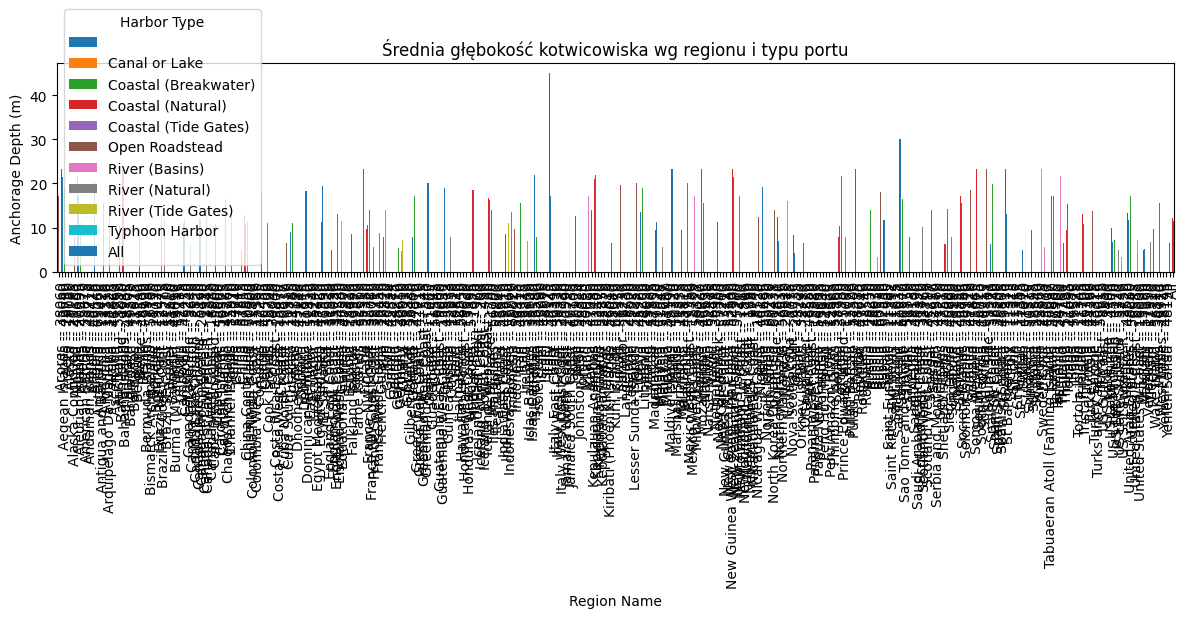

In [24]:
import matplotlib.pyplot as plt

pt.plot(kind='bar', figsize=(12, 6), title="Średnia głębokość kotwicowiska wg regionu i typu portu")
plt.ylabel("Anchorage Depth (m)")
plt.xlabel("Region Name")
plt.legend(title="Harbor Type")
plt.tight_layout()
plt.show()


In [26]:
# Grupuj dane na podstawie Country Code i Harbor Size, a następnie:

# Oblicz łączną głębokość kanału (Channel Depth (m)) i maksymalną głębokość ropy naftowej (Oil Terminal Depth (m)) dla każdej grupy.
# Wyniki zapisz jako DataFrame z wielopoziomowym indeksem (MultiIndex).
# Zresetuj indeks MultiIndex i przekształć wyniki z powrotem na prostą strukturę tabeli.

sum_depth = df.groupby(["Country Code", "Harbor Size"])["Channel Depth (m)"].sum()
print(sum_depth)

max_depth = df.groupby(["Country Code", "Harbor Size"])["Oil Terminal Depth (m)"].max()
print(max_depth)

Country Code    Harbor Size
                                0.0
Albania         Small           7.9
                Very Small     11.3
Algeria         Large          41.8
                Medium         12.5
                               ... 
Western Sahara  Very Small     12.5
Yemen           Large           0.0
                Medium         22.6
                Small          19.4
                Very Small      9.4
Name: Channel Depth (m), Length: 479, dtype: float64
Country Code    Harbor Size
                                0.0
Albania         Small           6.4
                Very Small     11.0
Algeria         Large           0.0
                Medium          0.0
                               ... 
Western Sahara  Very Small      0.0
Yemen           Large          11.0
                Medium         15.8
                Small          23.2
                Very Small     45.0
Name: Oil Terminal Depth (m), Length: 479, dtype: float64


In [28]:
df_multi_cols = df.groupby(["Country Code", "Harbor Size"])[
    ["Channel Depth (m)", "Oil Terminal Depth (m)"]
].agg(["sum", "max"])

print(df_multi_cols)


                           Channel Depth (m)       Oil Terminal Depth (m)  \
                                         sum   max                    sum   
Country Code   Harbor Size                                                  
                                         0.0   0.0                    0.0   
Albania        Small                     7.9   7.9                    6.4   
               Very Small               11.3   7.9                   11.0   
Algeria        Large                    41.8  23.2                    0.0   
               Medium                   12.5  12.5                    0.0   
...                                      ...   ...                    ...   
Western Sahara Very Small               12.5  12.5                    0.0   
Yemen          Large                     0.0   0.0                   11.0   
               Medium                   22.6  14.7                   23.7   
               Small                    19.4  10.0                   32.2   